In this notebook I show some plots from the electrolysis experiment (see 'Electrolysis report.pdf' file). I extract the data from 'data/data_lab.xlsx' file.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as m

In [ ]:
data = pd.ExcelFile('data/data_lab.xlsx')
df = data.parse('Resumen')

In [ ]:
# Valores constantes con su incertidumbre (unidades del S.I)

# Constante de Boltzmann; referencia: doi:10.1140/epjst/e2009-01054-2
kB = 1.380649e-23
kB_inc = 1e-32

# Carga del electrón; referencia: doi.org/10.1016/j.crhy.2018.11.007
e = 1.6021892e-19
e_inc = 0.0000046e-19

# Valor de referencia e/kB (teo)
ekB_teo = e/kB
ekB_inc_teo = ekB_teo*m.sqrt((kB_inc/kB)**2 + (e_inc/e)**2)

# valor promedio obtenido e/kB
ekB_prom = 11853.4156116946
ekB_inc = 751.65

In [ ]:
print(r"valor de referencia de $e/k_B$: ", ekB_teo)
print("Incertidumbre en el valor teórico: ", ekB_inc_teo)

valor de referencia de $e/k_B$:  11604.609136717587
Incertidumbre en el valor teórico:  0.0333176654339888


In [ ]:
# Incertidumbre sistemática y estadística

inc_est =  ekB_inc/m.sqrt(40) # inc estadística
inc_sis = df['Inc en e/kB'] - inc_est # inc sistemática

# Gráfica de valores experimentales - Comparación con valor de referencia

<ipython-input-6-969f73d447b0>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(df['ekB'], df['Medición'], xerr = df['Inc en e/kB'], fmt='.k', c='g', markerfacecolor="None", markeredgecolor='None', elinewidth=1, capsize=2, alpha=0.6)
<ipython-input-6-969f73d447b0>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(df['ekB'], df['Medición'], xerr = inc_sis, fmt='.k', c='olive', elinewidth=1, capsize=2, alpha=0.6)


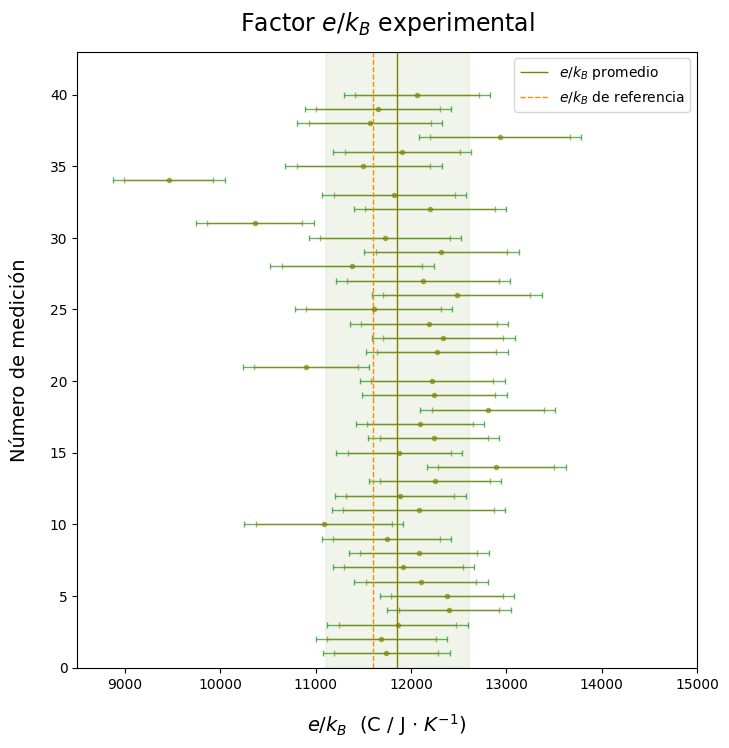

In [ ]:
# Plot principal + barras de error
# Color verde del paper en hex: #7ABF81

plt.figure(figsize=(8,8))
plt.errorbar(df['ekB'], df['Medición'], xerr = df['Inc en e/kB'], fmt='.k', c='g', markerfacecolor="None", markeredgecolor='None', elinewidth=1, capsize=2, alpha=0.6)
plt.errorbar(df['ekB'], df['Medición'], xerr = inc_sis, fmt='.k', c='olive', elinewidth=1, capsize=2, alpha=0.6)


plt.title(r'Factor $e/k_B$ experimental', pad=15, fontsize=17)
plt.ylabel('Número de medición', labelpad=15, fontsize=14)
plt.xlabel(r'$e/k_B$  (C / J $\cdot$ $K^{-1}$)', labelpad=15, fontsize=14)

# Límites del plot x & y
plt.ylim(0,43)
plt.xlim(8500,15000)

# Línea horizontal (experimental-promedio)
plt.vlines(ekB_prom, -10, 60, colors='olive', linestyles='solid', linewidth=1, label=r'$e/k_B$ promedio')
# Línea horizontal (teórica)
plt.vlines(ekB_teo, -10, 60, colors='darkorange', linestyles='dashed', linewidth=1, label=r'$e/k_B$ de referencia')

# Anotación
#plt.annotate(r'$e/k_B$', xy=(41,11300), color='darkred', fontsize=20)

# Incertidumbre en el valor experimental (región sombreada)

y = np.linspace(0, 43, 1000)

plt.fill_betweenx(y, ekB_prom - ekB_inc, ekB_prom + ekB_inc, color = '#B5C99A', alpha=0.2) # Región sombreada; incertidumbre en el valor promedio

plt.legend(loc='best', fontsize=10)
#plt.savefig('mainplot.pdf', format='pdf')
plt.show()

# Gráfica de valores experimentales - Caja y Bigote

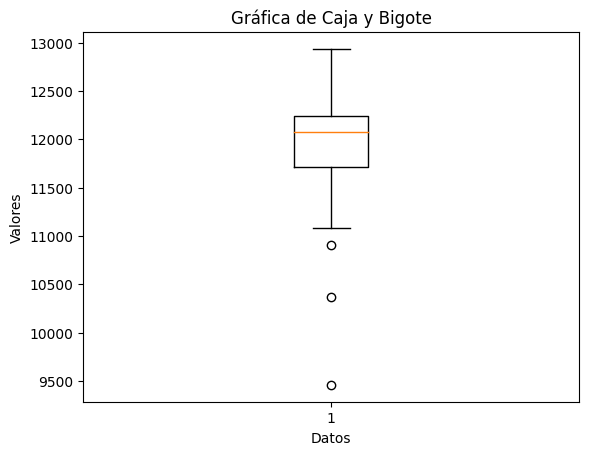

In [ ]:
import matplotlib.pyplot as plt

# Crear la gráfica de caja y bigote
plt.boxplot(df['ekB'])

# Agregar un título y etiquetas a los ejes
plt.title('Gráfica de Caja y Bigote')
plt.xlabel('Datos')
plt.ylabel('Valores')

# Mostrar la gráfica
plt.show()

# Gráfica de valores experimentales - Violín

In [ ]:
import seaborn as sns

[None, None]

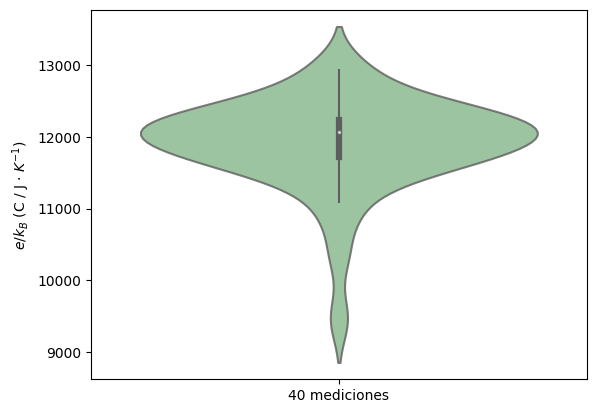

In [ ]:
ax = sns.violinplot(df['ekB'], color='#7ABF81')
#ax.set_title("Proceso de electrolisis", fontsize=16)
ax.set_xticklabels(["40 mediciones"])
ax.set_ylabel(r"$e/k_B$ (C / J $\cdot$ $K^{-1}$)", fontsize=10)
plt.setp(ax.collections, alpha=0.8)

#plt.savefig('violinplot.pdf', format='pdf')